In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import simplify
from sympy.abc import x,y,p
from sympy.solvers import solve
from sympy import Symbol

import scipy.integrate as integrate

from matplotlib.patches import Arc
#plt.style.use('seaborn')
#plt.rcParams.update(plt.rcParamsDefault) #reset parameters

In [2]:
myBlue = '#0072b2'#(0,114,178)
myRed = '#d55e00'# \definecolor{red}{RGB}{213,94,0}
myYellow ='#f2edc2'# \definecolor{yellow}{RGB}{242,237,194}
myGreen = '#009e73'# \definecolor{green}{RGB}{0,158,115}

In [71]:
def f_complete_info(p,x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            return p*0 + x11#np.piecewise(p, [p <= 0.001, (p>0.001) & (p<1), p >= 1], [lambda x: 0, lambda x: x11, lambda x: 1.0])
        else:
            print("x10 must be greater than x01.")
    else:
        print("Not a valid distribution.")

def f_no_info(p,x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            f1 = 1 - (x10/(x10+x11)*(x01+x11) - p*x01)/(p*x11) # 1 - \frac{\underline{p}(x_{11} + x_{01}) - p x_{01}}{px_{11}}
            f2 = 1 - (x10*(1-p))/(p*x11)#1 - \frac{x_{10}(1 - p)}{px_{11}}c1 = 0.327159886574049
            return np.maximum(0, x10*f1 + x01*f2 + x11*(1 - (1-f1)*(1-f2)))
        else:
            print("x10 must be greater than x01.")
    else:
        print("Not a valid distribution.")
        
def f_seller1_info(p, x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            x01_new = x01/(x01+x11)
            x11_new = x11/(x01+x11)
            f1_negative = 1 - (x01_new*(1-p))/(p*x11_new) # 1 - \frac{\underline{p}(x_{11} + x_{01}) - p x_{01}}{px_{11}}
            f2_negative = 1 - (x01_new/(x01_new+x11_new))/p
            f1 = np.maximum(0, f1_negative)
            f2 = np.maximum(0, f2_negative) 
#             f1_negative = 1 - (x01*(1-p))/(p*x11) # 1 - \frac{\underline{p}(x_{11} + x_{01}) - p x_{01}}{px_{11}}
#             f2_negative = 1 - (x01/(x01+x11))/p
#             f1 = np.maximum(0, f1_negative)
#             f2 = np.maximum(0, f2_negative)
            #1 - \frac{x_{10}(1 - p)}{px_{11}}c1 = 0.327159886574049
            return x01*f2 + x11*(1 - (1-f1)*(1-f2))
        else:
            print("x10 must be greater than x01.")
    else:
        print("Not a valid distribution.")
        
def f_seller2_info(p, x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            x10_new = x10/(x10+x11)
            x11_new = x11/(x10+x11)
            f1_negative = 1 - (x10_new/(x10_new+x11_new))/p # 1 - \frac{\underline{p}(x_{11} + x_{01}) - p x_{01}}{px_{11}}
            f2_negative =  1 - (x10_new*(1-p))/(p*x11_new)
            f1 = np.maximum(0, f1_negative)
            f2 = np.maximum(0, f2_negative)
#             f1_negative = 1 - (x10/(x10+x11))/p # 1 - \frac{\underline{p}(x_{11} + x_{01}) - p x_{01}}{px_{11}}
#             f2_negative =  1 - (x10*(1-p))/(p*x11)
#             f1 = np.maximum(0, f1_negative)
#             f2 = np.maximum(0, f2_negative)
            #1 - \frac{x_{10}(1 - p)}{px_{11}}c1 = 0.327159886574049
            return x10*f1 + x11*(1 - (1-f1)*(1-f2))
        else:
            print("x10 must be greater than x01.")
    else:
        print("Not a valid distribution.")

def f_public_info(p, x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            x11_1_total = x11*(x10/(x10+x01))
            x10_1 = x10/(x10+x11_1_total)
            x01_1 = 0
            x11_1 = x11_1_total/(x10+x11_1_total)
            f1_1_negative = 1 - (x10_1/(x10_1+x11_1)*(x01_1+x11_1) - p*x01_1)/(p*x11_1) # pricing in the new market that favors 1
            f2_1_negative = 1 - (x10_1*(1-p))/(p*x11_1)#1 - \frac{x_{10}(1 - p)}{px_{11}}c1 = 0.327159886574049
            f1_1 = np.maximum(0,f1_1_negative)
            f2_1 = np.maximum(0,f2_1_negative)
            x11_2_total = x11*(x01/(x10+x01))
            x10_2 = x01/(x01+x11_1_total)
            x01_2 = 0
            x11_2 = x11_1_total/(x01+x11_1_total)
            f1_2_negative = 1 - (x10_2/(x10_2+x11_2)*(x01_2+x11_2) - p*x01_2)/(p*x11_2)
            f2_2_negative = 1 - (x10_2*(1-p))/(p*x11_2)
            f1_2 = np.maximum(0,f1_2_negative)
            f2_2 = np.maximum(0,f2_2_negative)
            return x10/(x10+x01)*(x10*f1_1 + x01*f2_1 + x11*(1 - (1-f1_1)*(1-f2_1)))+ x01/(x10+x01)*(x10*f1_2 + x01*f2_2 + x11*(1 - (1-f1_2)*(1-f2_2)))
        else:
            print("x10 must be greater than x01.")
    else:
         print("Not a valid distribution.")

def f_private_dist1(p, x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            a1 = Symbol('a1', real=True, positive=True)
            a2 = Symbol('a2', real=True, positive=True)
            solutions = solve([x10 - (a1/(1-a2))*(x10 + a2*x11), x01 - (a1/(1-a2))*(x01 + a1*x11)], [a1, a2])#I swapped the a's in front of x11 and it returns a solution
            alphas = np.asarray(solutions)
            alpha1 = alphas[0][0]
            alpha2 = alphas[0][1]
            f1_private = 1 - (alpha2 - p*alpha2)/(p*(1-alpha1-alpha2))
            f2_private = 1 - (alpha1 - p*alpha1)/(p*(1-alpha1-alpha2))
            f1 = np.maximum(0,f1_private)
            f2 = np.maximum(0,f2_private)
            return x11*(alpha1*f1+ + (1-alpha1)*(1-(1-f1)))
        else:
            print("x10 must be greater than x01.")
    else:
        print("Not a valid distribution.")
        
def f_private_dist2(p, x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            a1 = Symbol('a1', real=True, positive=True)
            a2 = Symbol('a2', real=True, positive=True)
            solutions = solve([x10 - (a1/(1-a2))*(x10 + a2*x11), x01 - (a1/(1-a2))*(x01 + a1*x11)], [a1, a2])#I swapped the a's in front of x11 and it returns a solution
            alphas = np.asarray(solutions)
            alpha1 = alphas[0][0]
            alpha2 = alphas[0][1]
            f1_private = 1 - (alpha2 - p*alpha2)/(p*(1-alpha1-alpha2))
            f2_private = 1 - (alpha1 - p*alpha1)/(p*(1-alpha1-alpha2))
            f1 = np.maximum(0,f1_private)
            f2 = np.maximum(0,f2_private)
            return x11*(alpha2*f2+ + (1-alpha2)*(1-(1-f2)))
        else:
            print("x10 must be greater than x01.")
    else:
        print("Not a valid distribution.")
        
def f_private_info(p, x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            a1 = Symbol('a1', real=True, positive=True)
            a2 = Symbol('a2', real=True, positive=True)
            solutions = solve([x10 - (a1/(1-a2))*(x10 + a2*x11), x01 - (a1/(1-a2))*(x01 + a1*x11)], [a1, a2])#I swapped the a's in front of x11 and it returns a solution
            alphas = np.asarray(solutions)
            alpha1 = alphas[0][0]
            alpha2 = alphas[0][1]
            f1_private = 1 - (alpha2 - p*alpha2)/(p*(1-alpha1-alpha2))
            f2_private = 1 - (alpha1 - p*alpha1)/(p*(1-alpha1-alpha2))
            f1 = np.maximum(0,f1_private)
            f2 = np.maximum(0,f1_private)
            return x11*(alpha1*f1+ alpha2*f2 + (1-alpha1-alpha2)*(1-(1-f1)*(1-f2)))
        else:
            print("x10 must be greater than x01.")
    else:
        print("Not a valid distribution.")

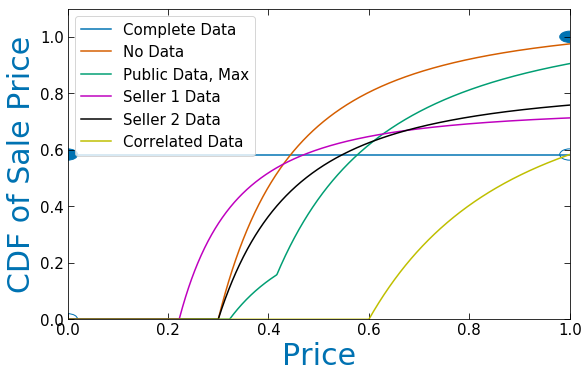

In [73]:
p = np.arange(0.001, 1.001, 0.001)

x10_prior=1/4
x01_prior=1/6
x11_prior= 1 - x10_prior - x01_prior

#Create figure
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
fig.set_size_inches(9,16)

plt.rcParams.update({'font.size': 15}) #font size, probably changes all of them

#Designing the Plot
plt.xlabel('Price', size=30, color=myBlue)
plt.ylabel('CDF of Sale Price', size=30, color=myBlue)
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.gca().set_aspect(9/16, adjustable='box')
plt.tick_params(axis='both',direction='in', top=True, right=True, length=6)

plt.plot(p, f_complete_info(p,x10_prior,x01_prior,x11_prior),color=myBlue, label='Complete Data')
plt.legend(loc='upper left',fontsize=15)
#Assign circles to variables - do not fill the centre circle!
circle0 = plt.Circle((0, 0),radius=0.02,color=myBlue,fill=False)
circle1 = plt.Circle((0, 1-x10_prior-x01_prior),radius=0.02,color=myBlue,fill=True)
circle2 = plt.Circle((1, 1-x10_prior-x01_prior),radius=0.02,color=myBlue,fill=False)
circle3 = plt.Circle((1, 1),radius=0.02,color=myBlue,fill=True)
#Draw the circles to our plot
ax.add_patch(circle0)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
plt.savefig('pricing_example1.png', transparent=True, dpi=300, bbox_inches="tight")

plt.plot(p, f_no_info(p,x10_prior,x01_prior,x11_prior), color=myRed, label='No Data')
plt.legend(loc='upper left',fontsize=15)
plt.savefig('pricing_example2.png', transparent=True, dpi=300, bbox_inches="tight")

plt.plot(p, f_public_info(p, x10_prior,x01_prior,x11_prior), color=myGreen, label='Public Data, Max')
plt.legend(loc='upper left',fontsize=15)
plt.savefig('pricing_example3.png', transparent=True, dpi=300, bbox_inches="tight")

plt.plot(p, f_seller1_info(p, x10_prior,x01_prior,x11_prior), color='m', label='Seller 1 Data')
plt.legend(loc='upper left',fontsize=15)
plt.savefig('pricing_example4.png', transparent=True, dpi=300, bbox_inches="tight")

plt.plot(p, f_seller2_info(p, x10_prior,x01_prior,x11_prior), color='k', label='Seller 2 Data')
plt.legend(loc='upper left',fontsize=15)
plt.savefig('pricing_example5.png', transparent=True, dpi=300, bbox_inches="tight")

plt.plot(p, f_private_info(p, x10_prior,x01_prior,x11_prior), 'y', label='Correlated Data')
plt.legend(loc='upper left',fontsize=15)
plt.savefig('pricing_example6.png', transparent=True, dpi=300, bbox_inches="tight")

plt.show() # Show the figure

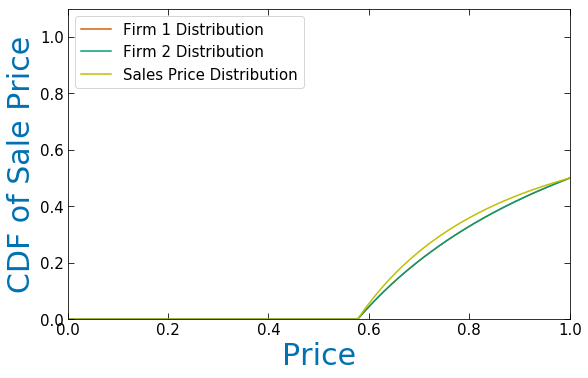

In [72]:
p = np.arange(0.001, 1.001, 0.001)

x10_prior=1/4
x01_prior=1/4
x11_prior= 1 - x10_prior - x01_prior

#Create figure
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
fig.set_size_inches(9,16)

plt.rcParams.update({'font.size': 15}) #font size, probably changes all of them

#Designing the Plot
plt.xlabel('Price', size=30, color=myBlue)
plt.ylabel('CDF of Sale Price', size=30, color=myBlue)
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.gca().set_aspect(9/16, adjustable='box')
plt.tick_params(axis='both',direction='in', top=True, right=True, length=6)

#plt.plot(p, f_complete_info(p,x10_prior,x01_prior,x11_prior),color=myBlue, label='Complete Info')
#plt.legend(loc='upper left',fontsize=15)

plt.plot(p, f_private_dist1(p, x10_prior,x01_prior,x11_prior), color=myRed, label='Firm 1 Distribution')
plt.legend(loc='upper left',fontsize=15)
plt.savefig('pricing_dist1.png', transparent=True, dpi=300, bbox_inches="tight")

plt.plot(p, f_private_dist2(p, x10_prior,x01_prior,x11_prior), color=myGreen, label='Firm 2 Distribution')
plt.legend(loc='upper left',fontsize=15)
plt.savefig('pricing_dist2.png', transparent=True, dpi=300, bbox_inches="tight")

plt.plot(p, f_private_info(p, x10_prior,x01_prior,x11_prior), 'y', label='Sales Price Distribution')
plt.legend(loc='upper left',fontsize=15)
plt.savefig('pricing_sales.png', transparent=True, dpi=300, bbox_inches="tight")

plt.show() # Show the figure

In [14]:
def ps_quality(q,x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            x10_10 = q*1 + (1-q)*x10
            x01_10 = (1-q)*x01
            x11_10 = (1-q)*x11
            profit_10 = x10_10 + x10_10/(x10_10 + x11_10 + 0.0001)*(1-x10_10)
            
            x10_01 = (1-q)*x10
            x01_01 = q*1 + (1-q)*x01
            x11_01 = (1-q)*x11
            profit_01 = np.maximum(x10_01 + x10_01/(x10_01 + x11_01  + 0.0001)*(1-x10_01), x01_01 + x01_01/(x01_01 + x11_01  + 0.0001)*(1-x01_01) ) #really just whether x10_01>=x01_01
            
            
            x10_11 = (1-q)*x10
            x01_11 = (1-q)*x01
            x11_11 = q*1 + (1-q)*x11
            profit_11 = x10_11 + x10_11/(x10_11 + x11_11 + 0.0001)*(1-x10_11)
            
            return  (x10*profit_10 + x01*profit_01 + x11*profit_11)
        else:
            print("x10 must be greater than x01.")
    else:
         print("Not a valid distribution.")

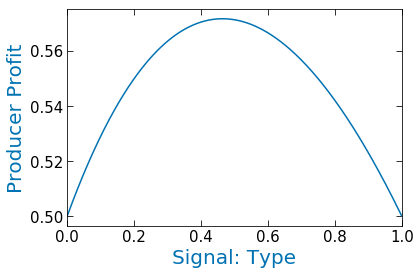

In [15]:
q = np.arange(0.0,1.0, 0.001)

#Create figure
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

plt.rcParams.update({'font.size': 15}) #font size, probably changes all of them


#Designing the Plot
plt.xlabel('Signal: Type', size=20, color=myBlue)
plt.ylabel('Producer Profit',size=20, color=myBlue)
plt.xlim(0, 1)
#plt.ylim(.725, .85)
#plt.gca().set_aspect(9/16, adjustable='box')
plt.tick_params(axis='both',direction='in', top=True, right=True, length=6)

plt.plot(q, ps_quality(q,x10_prior,x01_prior,x11_prior), color=myBlue)
#plt.legend(loc='upper left')

plt.savefig('ps_type_signal.png', transparent=True, dpi=200, bbox_inches="tight")

In [74]:
from scipy.integrate import quad

# quality_1 = cs_quality(1,x10_prior,x01_prior,x11_prior)
# print('Quality= 1 Profit: ', 1 - quality_1)


complete_info_profit = quad(f_complete_info, 0, 1, args=(x10_prior,x01_prior, x11_prior))
print('Complete Data Profit: ', 1-complete_info_profit[0])

complete_info_prof = x10_prior + x01_prior
print('Complete Data Profit (formula): ', complete_info_prof)

# quality_0 = cs_quality(0,x10_prior,x01_prior,x11_prior)
# print('Quality=0 Profit: ', 1 -quality_0)

no_info_profit = quad(f_no_info, 0, 1, args=(x10_prior,x01_prior, x11_prior))
print('No Data Profit:', 1-no_info_profit[0])

no_info_prof = x10_prior + x10_prior/(x10_prior + x11_prior)*(1-x10_prior)
print('No Data Profit (formula): ', no_info_prof)

public_info_profit = quad(f_public_info, 0, 1, args=(x10_prior,x01_prior, x11_prior))
print('Public Data Max Profit: ', 1-public_info_profit[0])

seller1_info_profit = quad(f_seller1_info, 0, 1, args=(x10_prior,x01_prior, x11_prior))
print('Seller 1 Data Profit: ', 1-seller1_info_profit[0])

seller2_info_profit = quad(f_seller2_info, 0, 1, args=(x10_prior,x01_prior, x11_prior))
print('Seller 2 Data Profit: ', 1-seller2_info_profit[0])

private_info_profit = quad(f_private_info, 0, 1, args=(x10_prior,x01_prior, x11_prior))
print('Correlated Data Profit: ', 1-private_info_profit[0])

Complete Data Profit:  0.41666666666666663
Complete Data Profit (formula):  0.41666666666666663
No Data Profit: 0.47500000000001086
No Data Profit (formula):  0.475
Public Data Max Profit:  0.5948803054282119
Seller 1 Data Profit:  0.5462962962964257
Seller 2 Data Profit:  0.5916666666666752
Correlated Data Profit:  0.8528134636671404


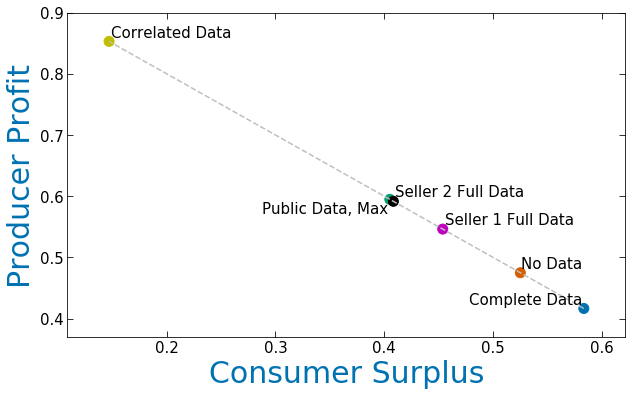

In [75]:
from adjustText import adjust_text
cs=[complete_info_profit[0],no_info_profit[0],public_info_profit[0],seller1_info_profit[0],seller2_info_profit[0],private_info_profit[0]]
ps=[1-complete_info_profit[0],1- no_info_profit[0],1 - public_info_profit[0],1-seller1_info_profit[0],1-seller2_info_profit[0],1- private_info_profit[0]]
n=['Complete Data', 'No Data', 'Public Data, Max', 'Seller 1 Full Data', 'Seller 2 Full Data', 'Correlated Data']

fig, ax = plt.subplots()

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
line = mlines.Line2D( [complete_info_profit[0], private_info_profit[0]], [1-complete_info_profit[0],1-private_info_profit[0]], color = '0.75', ls='--')

ax.scatter(cs, ps, c=[myBlue,myRed,myGreen,'m','k','y'], s=100) #should these be one by one for the slides?


transform = ax.transAxes
#line.set_transform(transform)
ax.add_line(line)
fig.set_size_inches(10, 10)


plt.xlabel('Consumer Surplus', size=30, color=myBlue)
plt.ylabel('Producer Profit',size=30, color=myBlue)
#plt.ylim(0, 0.3)
#plt.xlim(.7,1.0)
plt.gca().set_aspect(9/16, adjustable='box')
plt.tick_params(axis='both',direction='in', top=True, right=True, length=6)

texts = [plt.text(cs[i], ps[i], n[i]) for i in range(len(cs))]
adjust_text(texts, ha='left', va='bottom', size=20)

plt.savefig('surplus.png', transparent=True, dpi=300, bbox_inches="tight")

In [ ]:
from sympy.abc import x, y
from sympy.solvers import solve
from sympy import Symbol


In [ ]:
#x10 = Symbol('x10')
#x01 = Symbol('x01')
#x11 = Symbol('x11')
x10 = 1/4
x01 = 1/6
x11 = 1 - x10 - x01

a1 = Symbol('a1', real=True, positive=True)
a2 = Symbol('a2', real=True, positive=True)
solutions = solve([x10 - (a2/(1-a1))*(x10 + a2*x11), x01 - (a1/(1-a2))*(x01 + a1*x11)], [a1, a2])#I swapped the a's in front of x11 and it returns a solution
alphas = np.asarray(solutions)
alphas[0][0]
alphas[0][1]
# #type(solutions)
# #results = [(x,y) for x in solutions if t[0] > 0 and t[1]>0]
# #[(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]
# lst2 = [item[0] for item in solutions]
#less_than_zero = list(filter(lambda x: x**2 < 0, solutions))
# a = [[1, 2, 3, 4], [5, 6], [7, 8, 9]]
# for i in range(len(solutions)):
#     for j in range(len(solutions[i])):
#         sol=float(solutions[i][j])
#         return 
#     return sol[i][j]

In [ ]:
x10=1/3
x01=1/4
x11=1-x10-x01

p =Symbol('p')

f1 = 1 - (x10/(x10+x11)*(x01+x11) - p*x01)/(p*x11) # 1 - \frac{\underline{p}(x_{11} + x_{01}) - p x_{01}}{px_{11}}
f2 = 1 - (x10*(1-p))/(p*x11)#1 - \frac{x_{10}(1 - p)}{px_{11}}c1 = 0.327159886574049
simplify(f1)

In [ ]:
simplify(f2)

In [ ]:
f= x10*f1 + x01*f2 + x11*(1-(1-f1)*(1-f2))
simplify(f)

In [ ]:
cs_loyal(0,1/4,1/3,1/3)

In [ ]:
def ps_loyal(q,x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            x10_loyal = q*x10/(x10+x01) + (1-q)*x10
            x01_loyal = q*x01/(x10+x01) + (1-q)*x01
            x11_loyal = (1-q)*x11
            profit_loyal = x10_loyal + x10_loyal/(x10_loyal + x11_loyal + 0.0001)*(1-x10_loyal)
            
            x10_indifferent = (1-q)*x10
            x01_indifferent = (1-q)*x01
            x11_indifferent = q*1 + (1-q)*x11
            profit_indifferent = x10_indifferent + x10_indifferent/(x10_indifferent + x11_indifferent + 0.0001)*(1-x10_indifferent)
            
            return ((x10 +x01)*profit_loyal + x11*profit_indifferent)
        else:
            print("x10 must be greater than x01.")
    else:
         print("Not a valid distribution.")

In [ ]:
q = np.arange(0.0,1.0, 0.001)


x10_prior=1/4
x01_prior=1/6
x11_prior= 1 - x10_prior - x01_prior


#Create figure
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

plt.rcParams.update({'font.size': 15}) #font size, probably changes all of them


#Designing the Plot
plt.xlabel('Signal: Loyal or Indifferent', size=20, color=myBlue)
plt.ylabel('Producer Profit',size=20, color=myBlue)
plt.xlim(0, 1)
#plt.ylim(.725, .85)
#plt.gca().set_aspect(9/16, adjustable='box')
plt.tick_params(axis='both',direction='in', top=True, right=True, length=6)

plt.plot(q, ps_loyal(q,x10_prior,x01_prior,x11_prior), color=myBlue)
#plt.legend(loc='upper left')

plt.savefig('ps_loyal_signal.png', transparent=True, dpi=200, bbox_inches="tight")

In [ ]:
def f_private_info_alphya(p, x10,x01,x11):
    if x10+x01+x11==1:
        if x10>=x01:
            a1 = Symbol('a1', real=True, positive=True)
            a2 = Symbol('a2', real=True, positive=True)
            solutions = solve([x10 - (a2/(1-a1))*(x10 + a2*x11), x01 - (a1/(1-a2))*(x01 + a1*x11)], [a1, a2])#I swapped the a's in front of x11 and it returns a solution
            alphas = np.asarray(solutions)
            alpha1 = alphas[0][0]
            alpha2 = alphas[0][1]
            f1_private = 1 - (alpha2 - p*alpha2)/(p*(1-alpha1-alpha2))
            f2_private = 1 - (alpha1 - p*alpha1)/(p*(1-alpha1-alpha2))
            f1 = np.maximum(0,f1_private)
            f2 = np.maximum(0,f1_private)
            return x11*(alpha1*f1+ alpha2*f2 + (1-alpha1-alpha2)*(1-(1-f1)*(1-f2)))
        else:
            print("x10 must be greater than x01.")
    else:
        print("Not a valid distribution.")

In [69]:
x10 = 1/2
x01 = 1/3
x11=1-x10-x01

a1 = Symbol('a1', real=True, positive=True)
a2 = Symbol('a2', real=True, positive=True)
solutions = solve([x10 - (a1/(1-a2))*(x10 + a2*x11), x01 - (a1/(1-a2))*(x01 + a1*x11)], [a1, a2])#I swapped the a's in front of x11 and it returns a solution
alphas = np.asarray(solutions)
alpha1 = alphas[0][0]
alpha2 = alphas[0][1]
alphas

array([[0.372281323269014, 0.558421984903521]], dtype=object)

In [ ]:
1/2*(np.sqrt(3)-1)

In [ ]:
1/2*np.sqrt(3)

In [56]:
m10 = Symbol('m10', real=True, positive=True)
m01 = Symbol('m01', real=True, positive=True)
#m11 = Symbol('m1', real=True, positive=True)
p1 = Symbol('p1', real=True, positive=True)
p2 = Symbol('p2', real=True, positive=True)
a1 = Symbol('a1', real=True, positive=True)
a2 = Symbol('a2', real=True, positive=True)

solutions = solve([m10 - (a2/(1-a1))*(m10 + a2*(1-m10-m01)), m01 - (a1/(1-a2))*(m01 + a1*(1-m10-m01))], [a1, a2])
# asolutions=solve([ m10 - (a1/(1-a2))*(m10 + a2*(1-m10-m01)), m01 - (a2/(1-a1))*(m01 + a1*(1-m10-m01)),],[a1,a2])

KeyboardInterrupt: 

In [53]:
m10=1/3

solutions = solve([m10 - (a1/(1-a1))*(m10 + a1*(1-2*m10)), m10 - (a1/(1-a1))*(m10 + a1*(1-2*m10))], [a1])
solutions

[(0.414213562373095,)]

In [51]:
mu= 1-2*m10
aequation = 1/2*((mu*(2-mu))**(1/2)-mu)/(1-mu)
aequation

0.3090169943749474

In [52]:
aequation2=(m10*(2-m10))**(1/2)
aequation2

0.7453559924999299